<a href="https://colab.research.google.com/github/vedantchavare04/movieds/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
movie=pd.read_csv('cost_revenue_dirty.csv')
tags_to_remove=['$',',']
cols_to_clean=[
    'USD_Production_Budget','USD_Worldwide_Gross','USD_Domestic_Gross'
]

for cols in cols_to_clean:
  for tags in tags_to_remove:
    movie[cols]=movie[cols].str.replace(tags,'')
  movie[cols]=pd.to_numeric(movie[cols])
movie

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [ ]:
movie['Release_Date']=pd.to_datetime(movie['Release_Date'])
movie['Release_Date'].max()

Timestamp('2020-12-31 00:00:00')

In [ ]:
to_remove=movie[movie['USD_Worldwide_Gross']==0 ]
movie.drop(to_remove.index,inplace=True)
movie

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000
...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [ ]:
remove=movie[movie['USD_Domestic_Gross']==0]
movie.drop(remove.index,inplace=True)
movie

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000
...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [ ]:
data=pd.DatetimeIndex(movie['Release_Date']).year
decade=data//10*10
movie['Decade']=decade
movie

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
...,...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010,2010
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010


In [ ]:
movie[movie['USD_Worldwide_Gross']==2783918982]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000


In [ ]:
movie[movie['USD_Worldwide_Gross']==401]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3198,5380,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401,2000


In [ ]:
fig=px.scatter(
    movie,
    x='Decade',
    y='USD_Production_Budget',
    color="USD_Worldwide_Gross",
    size='USD_Worldwide_Gross',
    hover_data=['USD_Worldwide_Gross','Movie_Title']
               )
fig.show()

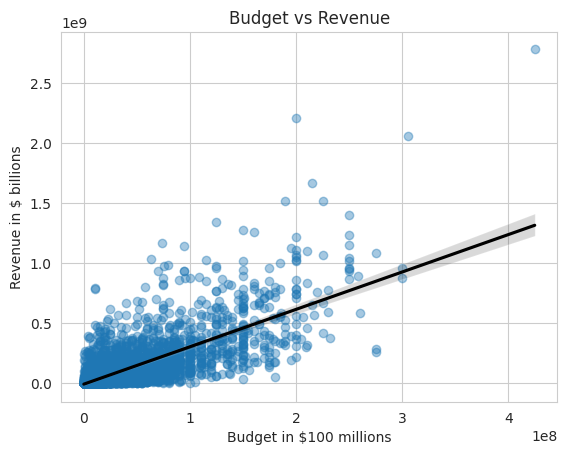

In [ ]:
with sns.axes_style('whitegrid'):
  sns.regplot(data=movie,x='USD_Production_Budget',y='USD_Worldwide_Gross',scatter_kws={'alpha':0.4},line_kws={'color':'black'})
  plt.title('Budget vs Revenue')
  plt.xlabel('Budget in $100 millions')
  plt.ylabel('Revenue in $ billions')
  plt.show()

In [ ]:
regression=LinearRegression()

In [ ]:
X=pd.DataFrame(movie,columns=['USD_Production_Budget'])
Y=pd.DataFrame(movie,columns=['USD_Worldwide_Gross'])
regression.fit(X,Y)
regression.intercept_

array([-6516010.52875766])

In [ ]:
regression.coef_

array([[3.11158929]])